In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 2048.", name="epoch 100")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2048)              4200448   
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 4,251,673
Trainable params: 4,251,673
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 2.4446 - mae: 1.2823INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 766ms/step - loss: 2.4446 - mae: 1.2823 - val_loss: 1.8352 - val_mae: 1.1657
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 3.6923 - mae: 1.5975INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 620ms/step - loss: 3.6923 - mae: 1.5975 - val_loss: 0.7413 - val_mae: 0.6788
Epoch 3/100
5/5 [==============================] - 1s 215ms/step - loss: 5.3395 - mae: 2.0549 - val_loss: 3.0552 - val_mae: 1.5436
Epoch 4/100
5/5 [==============================] - 1s 184ms/step - loss: 4.8500 - mae: 1.8532 - val_loss: 6.9719 - val_mae: 2.5804
Epoch 5/100
5/5 [==============================] - 1s 187ms/step - loss: 5.7821 - mae: 1.9869 - val_loss: 7.1734 - val_mae: 2.5102
Epoch 6/100
5/5 [==============================] - 1s 184ms/step - loss: 3.4019 - mae: 1.5066 - val_loss: 6.9438 - val_mae: 2.4947
Epoch 7/100
5/5 [==============================] - 1s 184ms/step - loss: 5.2813 - mae: 2.1248 - val_loss: 2.7756 - val_mae: 1.5005
Epoch 8/100
5/5 [==============================] - 1s 191ms/step - loss: 2.1241 - mae: 1.1911 - val_loss: 4.0200 - val_mae: 1.8669
Epoch 9/100
5/5 [==============================] - 1s 189ms/step - loss: 5.6515 - mae: 2.2069 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 653ms/step - loss: 2.7884 - mae: 1.4312 - val_loss: 0.7187 - val_mae: 0.6908
Epoch 12/100
5/5 [==============================] - 1s 216ms/step - loss: 1.0803 - mae: 0.8573 - val_loss: 2.9429 - val_mae: 1.6274
Epoch 13/100
5/5 [==============================] - ETA: 0s - loss: 2.8131 - mae: 1.4195INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 633ms/step - loss: 2.8131 - mae: 1.4195 - val_loss: 0.2879 - val_mae: 0.4392
Epoch 14/100
5/5 [==============================] - 1s 208ms/step - loss: 2.6334 - mae: 1.2297 - val_loss: 0.4124 - val_mae: 0.5076
Epoch 15/100
5/5 [==============================] - 1s 188ms/step - loss: 1.4395 - mae: 0.9522 - val_loss: 2.1802 - val_mae: 1.3437
Epoch 16/100
5/5 [==============================] - 1s 193ms/step - loss: 1.5830 - mae: 0.9682 - val_loss: 4.2925 - val_mae: 2.0044
Epoch 17/100
5/5 [==============================] - 1s 196ms/step - loss: 1.3966 - mae: 0.8955 - val_loss: 2.0235 - val_mae: 1.2944
Epoch 18/100
5/5 [==============================] - 1s 188ms/step - loss: 1.4770 - mae: 1.0190 - val_loss: 0.5192 - val_mae: 0.5869
Epoch 19/100
5/5 [==============================] - 1s 184ms/step - loss: 4.5084 - mae: 1.8418 - val_loss: 0.6896 - val_mae: 0.6776
Epoch 20/100
5/5 [==============================] - 1s 207ms/step - loss: 1.0030 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 586ms/step - loss: 0.6156 - mae: 0.6643 - val_loss: 0.2126 - val_mae: 0.3734
Epoch 27/100
5/5 [==============================] - 1s 213ms/step - loss: 0.2407 - mae: 0.3905 - val_loss: 1.6914 - val_mae: 1.2313
Epoch 28/100
5/5 [==============================] - 1s 192ms/step - loss: 1.8188 - mae: 1.1941 - val_loss: 1.9682 - val_mae: 1.3102
Epoch 29/100
5/5 [==============================] - 1s 187ms/step - loss: 1.1211 - mae: 0.8708 - val_loss: 0.2146 - val_mae: 0.3775
Epoch 30/100
5/5 [==============================] - 1s 189ms/step - loss: 0.1941 - mae: 0.3560 - val_loss: 0.2202 - val_mae: 0.3798
Epoch 31/100
5/5 [==============================] - ETA: 0s - loss: 0.1854 - mae: 0.3451INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 588ms/step - loss: 0.1854 - mae: 0.3451 - val_loss: 0.1468 - val_mae: 0.3138
Epoch 32/100
5/5 [==============================] - 1s 218ms/step - loss: 0.1793 - mae: 0.3490 - val_loss: 0.2364 - val_mae: 0.3905
Epoch 33/100
5/5 [==============================] - 1s 184ms/step - loss: 0.1713 - mae: 0.3379 - val_loss: 0.1565 - val_mae: 0.3213
Epoch 34/100
5/5 [==============================] - ETA: 0s - loss: 0.1523 - mae: 0.3143INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 667ms/step - loss: 0.1523 - mae: 0.3143 - val_loss: 0.1105 - val_mae: 0.2709
Epoch 35/100
5/5 [==============================] - ETA: 0s - loss: 0.1136 - mae: 0.2762INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_231004-2ry430gk\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 619ms/step - loss: 0.1136 - mae: 0.2762 - val_loss: 0.1096 - val_mae: 0.2679
Epoch 36/100
5/5 [==============================] - 1s 210ms/step - loss: 0.1167 - mae: 0.2793 - val_loss: 0.1596 - val_mae: 0.3363
Epoch 37/100
5/5 [==============================] - 1s 194ms/step - loss: 0.1256 - mae: 0.2887 - val_loss: 0.2020 - val_mae: 0.3786
Epoch 38/100
5/5 [==============================] - 1s 186ms/step - loss: 0.2919 - mae: 0.4303 - val_loss: 0.7199 - val_mae: 0.7043
Epoch 39/100
5/5 [==============================] - 1s 182ms/step - loss: 0.5606 - mae: 0.6122 - val_loss: 0.3814 - val_mae: 0.5035
Epoch 40/100
5/5 [==============================] - 1s 182ms/step - loss: 1.6890 - mae: 1.0747 - val_loss: 0.2554 - val_mae: 0.4104
Epoch 41/100
5/5 [==============================] - 1s 188ms/step - loss: 0.3548 - mae: 0.4730 - val_loss: 0.5036 - val_mae: 0.5824
Epoch 42/100
5/5 [==============================] - 1s 188ms/step - loss: 0.4785 - mae: 0

5/5 [==============================] - 1s 180ms/step - loss: 0.1235 - mae: 0.2913 - val_loss: 0.1440 - val_mae: 0.3191
Epoch 98/100
5/5 [==============================] - 1s 180ms/step - loss: 0.1262 - mae: 0.2927 - val_loss: 0.1428 - val_mae: 0.3168
Epoch 99/100
5/5 [==============================] - 1s 180ms/step - loss: 0.1259 - mae: 0.2947 - val_loss: 0.1450 - val_mae: 0.3204
Epoch 100/100
5/5 [==============================] - 1s 189ms/step - loss: 0.1268 - mae: 0.2938 - val_loss: 0.1433 - val_mae: 0.3167


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 131ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.4696184, 1.5317069, 1.5160173, 1.5026342, 1.4962959, 1.4943103,
        1.5746893, 1.6425495, 1.6915462, 1.6494635, 1.6130501, 1.5822511,
        1.5839232, 1.6037053, 1.6377269, 1.6144403, 1.5884837, 1.6429718,
        1.6594456, 1.7211884, 1.834098 , 1.6910588, 1.6799492, 1.7285326,
        1.6592981]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

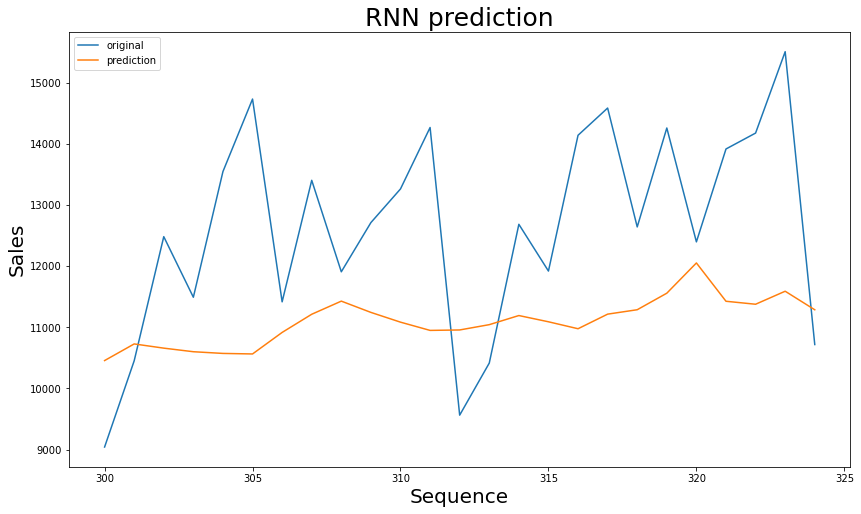

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 22ms/step - loss: 0.2527 - mae: 0.4269


[0.2527385354042053, 0.42687371373176575]